Este ejemplo muestra, con Keras y Tensorflow, cómo entrenar un modelo definido por nosotros con datos descargados desde la librería Keras.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adagrad, Adadelta
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
import os

Decargamos el dataset con la librería Keras:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Cargamos el dataset localmente:

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape

(28, 28)

Vamos a visualizar una de las muestras y la clase a la que pertenece:

9


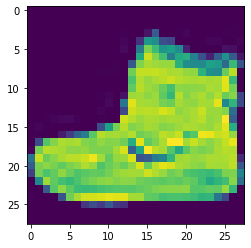

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])

Normalizamos las imágenes para que estén entre los valores 0 y 1:

In [ ]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Hiperparámetros: parámetros no optimizables por el algoritmo de retropropagación
# Suelen fijarse mediante ensayo y error y mediante experiencia

NB_EPOCH = 100       # numero de epocas de entrenamiento
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

Definiremos un modelo muy simple con una capa Flatten (para convertir la imagen, con forma de matriz, en un array unidimensional) y dos capas Dense, o Fully-Connected.

Compilamos el modelo indicando su optimizador, función de loss y métrica, e iniciamos el entrenamiento.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_split=VALIDATION_SPLIT)

Epoch 1/100
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6169 - accuracy: 0.7849 - val_loss: 0.4394 - val_accuracy: 0.8388
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3797 - accuracy: 0.8616 - val_loss: 0.3822 - val_accuracy: 0.8614
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3304 - accuracy: 0.8762 - val_loss: 0.3612 - val_accuracy: 0.8697
Epoch 4/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3048 - accuracy: 0.8895 - val_loss: 0.3754 - val_accuracy: 0.8612
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.8928 - val_loss: 0.3304 - val_accuracy: 0.8847
Epoch 6/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2659 - accuracy: 0.9028 - val_loss: 0.3238 - val_accuracy: 0.8876
Epoch 7/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2494 - accuracy: 0.9071 - val_loss: 0.3294 - val_ac

Con el conjunto de test, evaluamos el modelo entrenado:

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9186 - accuracy: 0.8868


[0.9185804724693298, 0.8867999911308289]

Con las siguientes gráficas podemos concluir que el modelo entrenado sufre de overfitting:

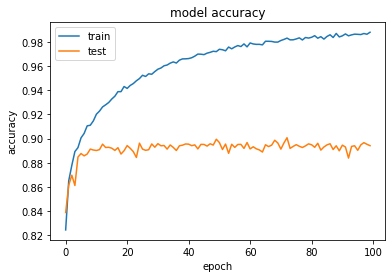

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

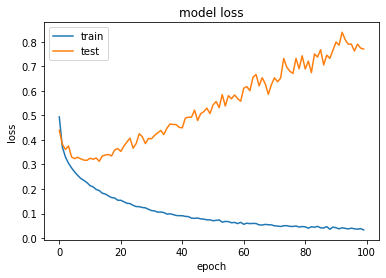

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
OUT_MODEL_PATH= '/content/gdrive/MyDrive/Curso-Jetson/models'
model.save(os.path.join(OUT_MODEL_PATH, 'model-final-pract1.hdf5'))
model.save(os.path.join(OUT_MODEL_PATH, 'model-final-pract1'))

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Curso-Jetson/models/model-final-pract1/assets


In [ ]:
!ls '/content/gdrive/MyDrive/Curso-Jetson/models'

model-final-pract1  model-final-pract1.hdf5  model-final-pract2.hdf5
